1) В среде  Google  Colab  создать новый блокнот (notebook). Импортировать необходимые для работы библиотеки и модули.Вариант 1, набор данных - Letters.

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/is_lab2')

# скачивание библиотеки
!wget -N http://uit.mpei.ru/git/main/is_dnn/raw/branch/main/labworks/LW2/lab02_lib.py
# скачивание выборок
!wget -N http://uit.mpei.ru/git/main/is_dnn/raw/branch/main/labworks/LW2/data/letter_train.txt
!wget -N http://uit.mpei.ru/git/main/is_dnn/src/branch/main/labworks/LW2/data/letter_test.txt
# создание папки
!mkdir out5

--2023-10-02 06:05:25--  http://uit.mpei.ru/git/main/is_dnn/raw/branch/main/labworks/LW2/lab02_lib.py
Resolving uit.mpei.ru (uit.mpei.ru)... 193.233.68.149
Connecting to uit.mpei.ru (uit.mpei.ru)|193.233.68.149|:80... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘lab02_lib.py’ not modified on server. Omitting download.

--2023-10-02 06:05:25--  http://uit.mpei.ru/git/main/is_dnn/raw/branch/main/labworks/LW2/data/letter_train.txt
Resolving uit.mpei.ru (uit.mpei.ru)... 193.233.68.149
Connecting to uit.mpei.ru (uit.mpei.ru)|193.233.68.149|:80... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘letter_train.txt’ not modified on server. Omitting download.

--2023-10-02 06:05:26--  http://uit.mpei.ru/git/main/is_dnn/src/branch/main/labworks/LW2/data/letter_test.txt
Resolving uit.mpei.ru (uit.mpei.ru)... 193.233.68.149
Connecting to uit.mpei.ru (uit.mpei.ru)|193.233.68.149|:80... connected.
HTTP request sent, awaiting response... 200 OK
Len

2) Сгенерировать индивидуальный набор двумерных данных в пространстве признаков с координатами центра  (k,  k),  где  k  –  номер бригады. Вывести полученные данные на рисунок и в консоль.

In [ ]:
# импортмодулей
import numpy as np
import lab02_lib as lib

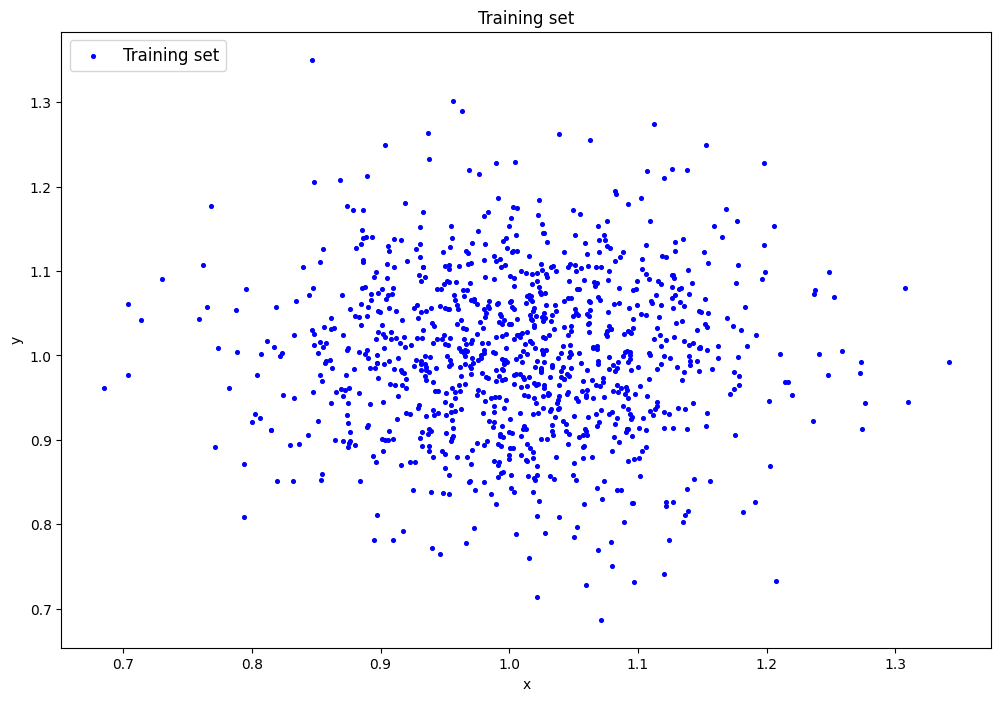

Исходные данные:
[[1.09593519 0.82453926]
 [1.02638122 0.95169417]
 [1.04700494 1.00375762]
 ...
 [0.93068165 1.15238636]
 [1.02120561 0.71319693]
 [1.04579318 0.89452026]]
Размерность данных:
(1000, 2)


In [ ]:
# генерация датасета
data = lib.datagen(1, 1, 1000, 2)

# вывод данных и размерности
print('Исходные данные:')
print(data)
print('Размерность данных:')
print(data.shape)

3) Создать и обучить автокодировщик AE1 простой архитектуры,  выбрав небольшое количество эпох обучения. Зафиксировать в таблице вида табл.1 количество скрытых слоёв и нейронов в них.

In [ ]:
# обучение AE1
patience = 300
ae1_trained, IRE1, IREth1 = lib.create_fit_save_ae(data,'out/AE1.h5','out/AE1_ire_th.txt', 50, True, patience)

Задать архитектуру автокодировщиков или использовать архитектуру по умолчанию? (1/2): 1
Задайте количество скрытых слоёв (нечетное число) : 1
Задайте архитектуру скрытых слоёв автокодировщика, например, в виде 3 1 3 : 1
Epoch 1/50
1/1 [==============================] - 1s 905ms/step - loss: 1.6892
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 1.6771
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 1.6652
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 1.6532
Epoch 5/50
1/1 [==============================] - 0s 8ms/step - loss: 1.6413
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 1.6294
Epoch 7/50
1/1 [==============================] - 0s 7ms/step - loss: 1.6175
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 1.6057
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 1.5939
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 1.5822
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4)Зафиксировать ошибку MSE, на которой обучение завершилось. Построить график ошибки реконструкции обучающей выборки. Зафиксировать порог ошибки реконструкции   –   порог обнаружения аномалий.

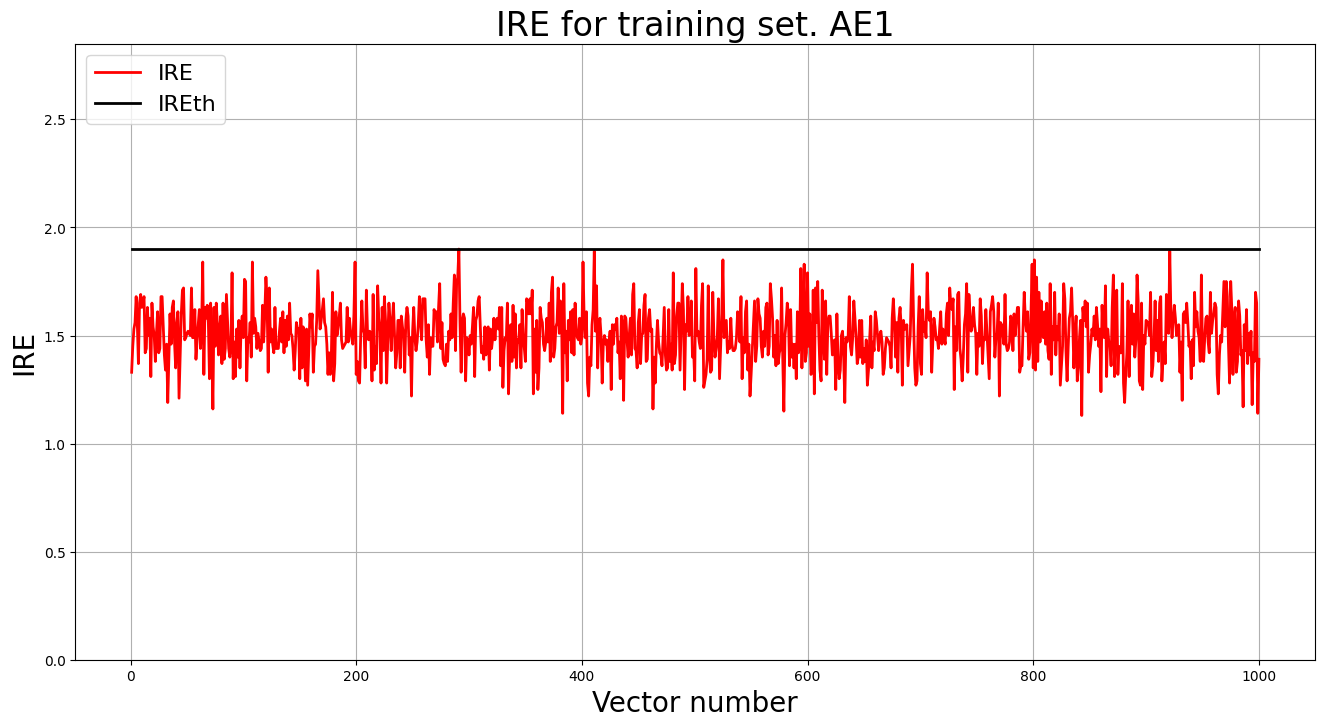

Порог ошибки реконструкции 1.9


In [ ]:
# Построение графика ошибки реконструкции
lib.ire_plot('training', IRE1, IREth1, 'AE1')
print("Порог ошибки реконструкции", IREth1)

5) Создать и обучить второй автокодировщик AE2 с усложненной архитектурой, задав большее количество эпох обучения.

In [ ]:
# обучение AE2
patience = 300
ae2_trained, IRE2, IREth2 = lib.create_fit_save_ae(data,'out/AE2.h5','out/AE2_ire_th.txt', 500, True, patience)

Задать архитектуру автокодировщиков или использовать архитектуру по умолчанию? (1/2): 1
Задайте количество скрытых слоёв (нечетное число) : 3
Задайте архитектуру скрытых слоёв автокодировщика, например, в виде 3 1 3 : 3 1 3
Epoch 1/500
1/1 [==============================] - 1s 797ms/step - loss: 0.6591
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6507
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 0.6423
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6340
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6257
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 0.6175
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 0.6093
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6011
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5931
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - lo

6) Зафиксировать ошибку MSE, на которой обучение завершилось. Построить график ошибки реконструкции обучающей выборки. Зафиксировать второй порог ошибки реконструкции – порог обнаружения аномалий.

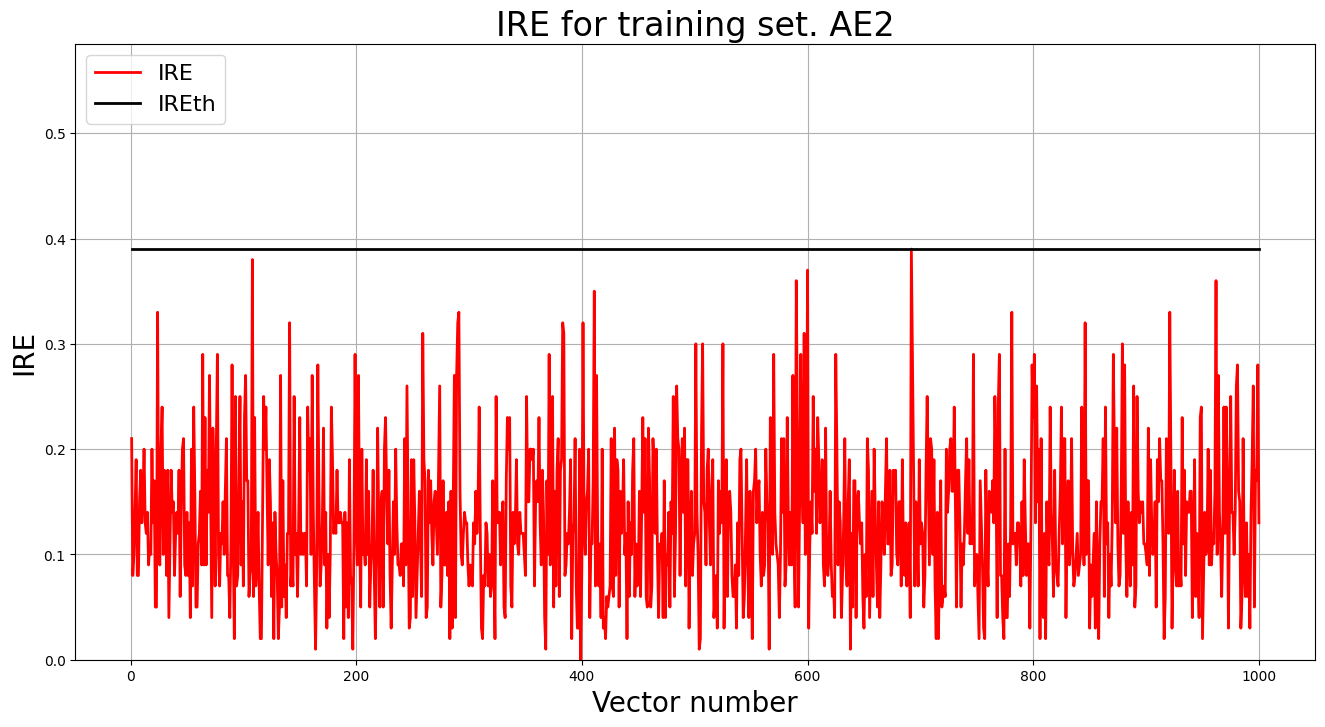

Порог ошибки реконструкции: 0.39


In [ ]:
# Построение графика ошибки реконструкции
lib.ire_plot('training', IRE2, IREth2, 'AE2')
print("Порог ошибки реконструкции:", IREth2)

7) Рассчитать характеристики качества обучения EDCA для AE1 и  AE2. Визуализировать и сравнить области пространства признаков, распознаваемые автокодировщиками AE1 и AE2.   Сделать вывод о пригодности AE1 и AE2 для качественного обнаружения аномалий.

229/229 [==============================] - 0s 825us/step


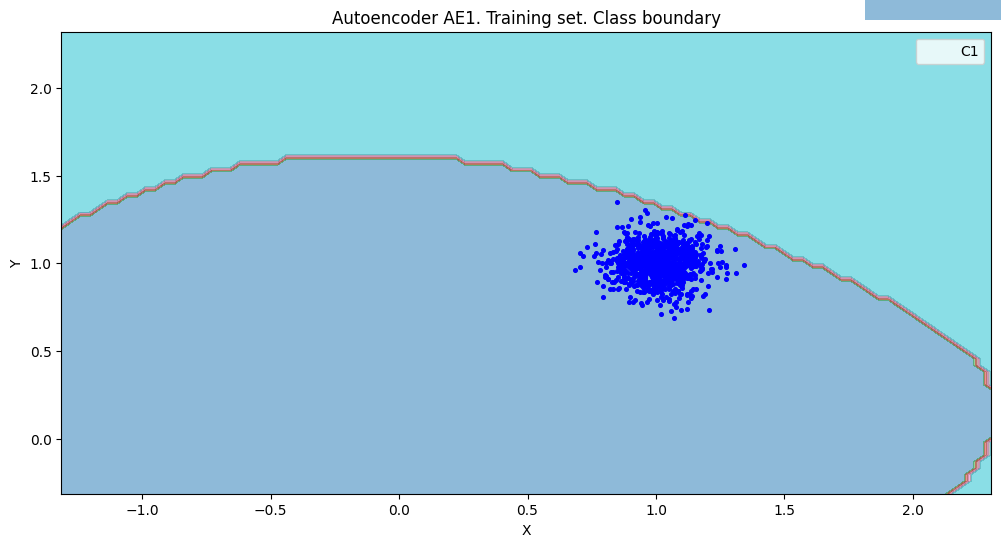

amount:  19
amount_ae:  256


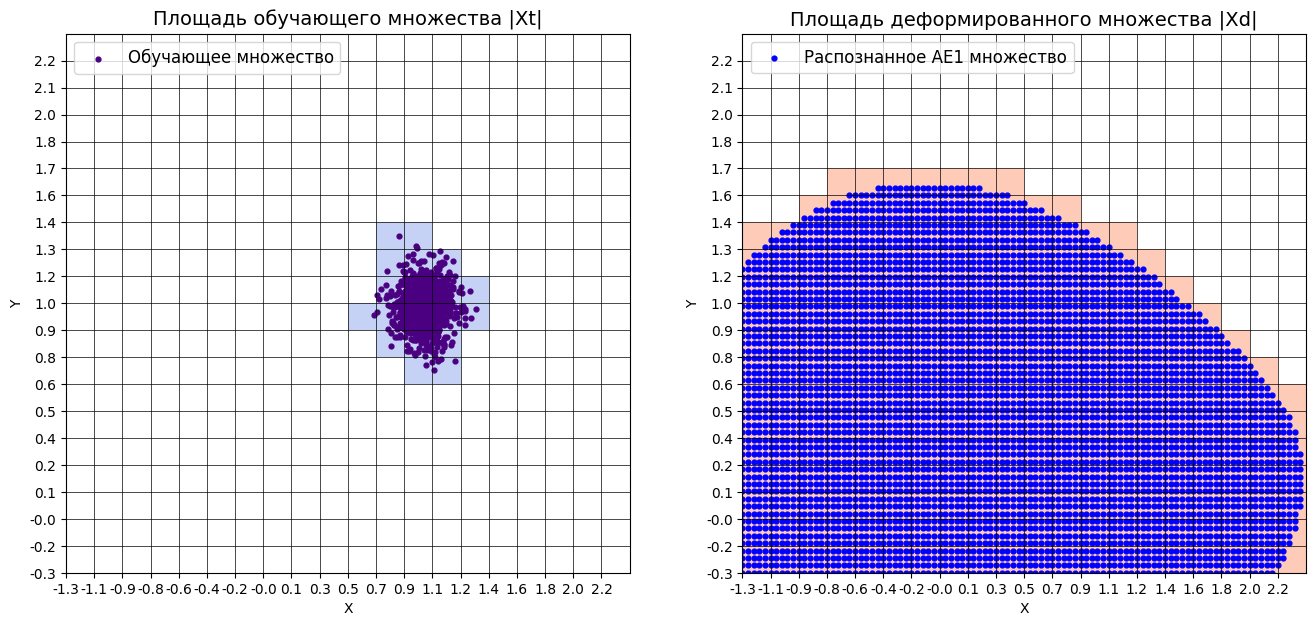

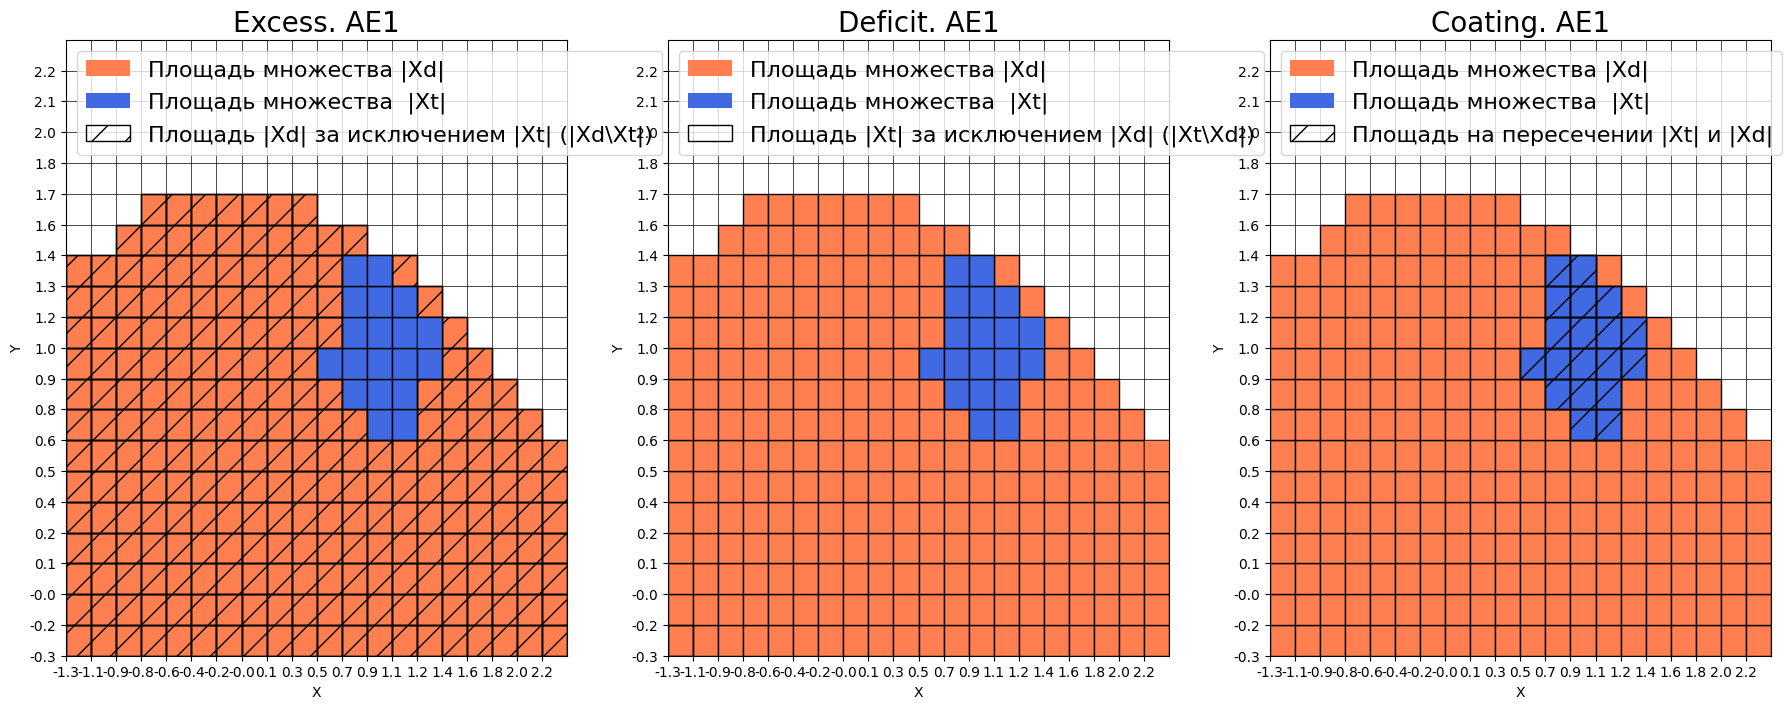


Оценка качества AE1
IDEAL = 0. Excess:  12.473684210526315
IDEAL = 0. Deficit:  0.0
IDEAL = 1. Coating:  1.0
summa:  1.0
IDEAL = 1. Extrapolation precision (Approx):  0.07421875




In [ ]:
# построение областей покрытия и границ классов
# расчет характеристик качества обучения
numb_square = 20
xx, yy, Z1 = lib.square_calc(numb_square, data, ae1_trained, IREth1, '1', True)

229/229 [==============================] - 0s 928us/step


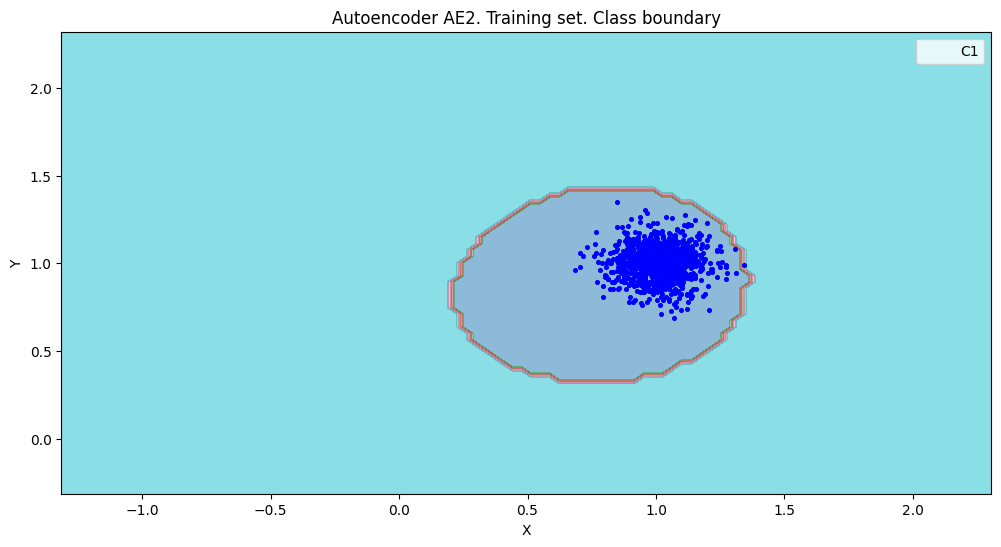

amount:  19
amount_ae:  54


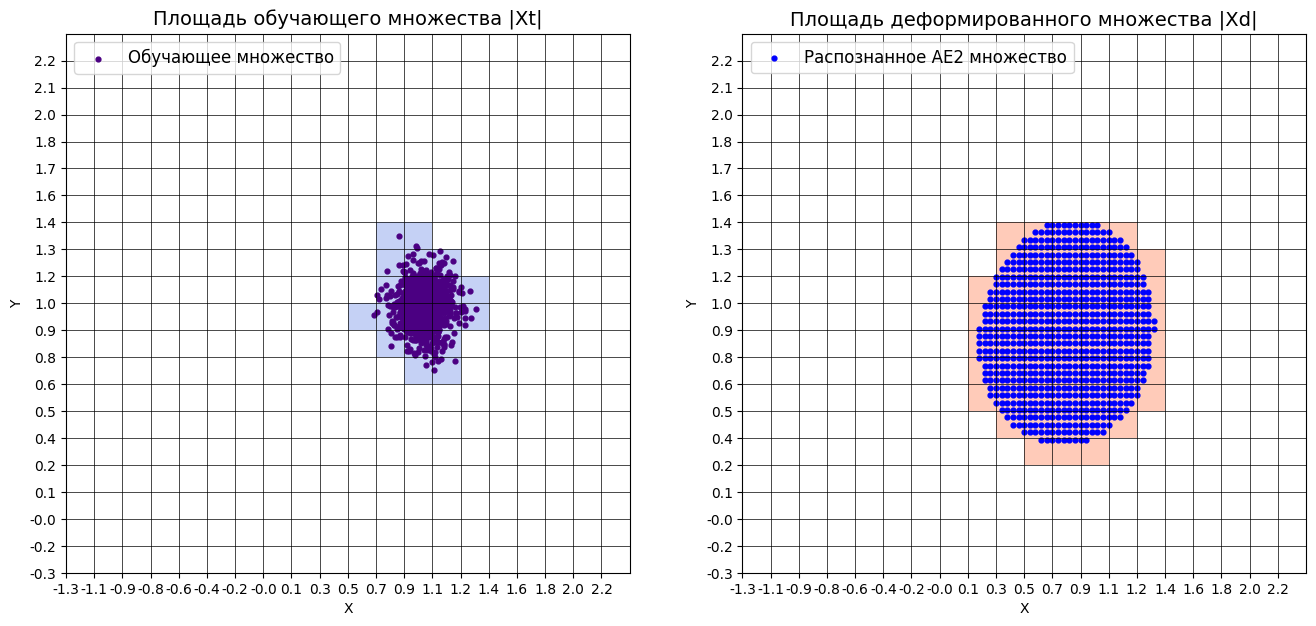

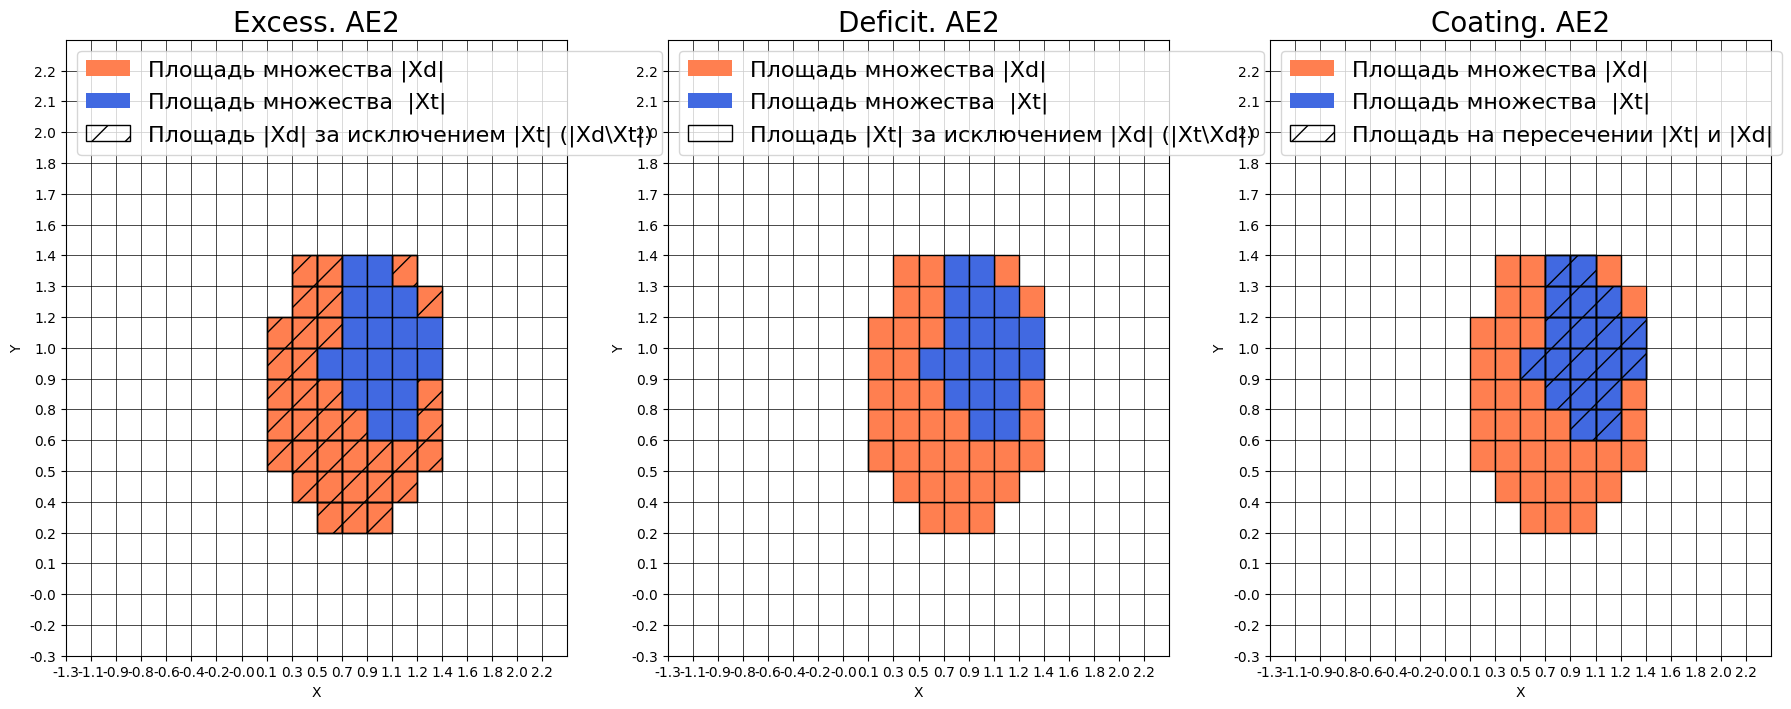


Оценка качества AE2
IDEAL = 0. Excess:  1.8421052631578947
IDEAL = 0. Deficit:  0.0
IDEAL = 1. Coating:  1.0
summa:  1.0
IDEAL = 1. Extrapolation precision (Approx):  0.3518518518518518




In [ ]:
#построение областей покрытия и границ классов
#расчет характеристик качества обучения
numb_square = 20
xx, yy, Z2 = lib.square_calc(numb_square, data, ae2_trained, IREth2, '2', True)